# Лабораторная работа №8

## "Решение краевых задач"

In [22]:
import numpy as np
import matplotlib.pyplot as plt

---

### Задача 8.1

Найти аналитическое и приближенное решения краевой задачи
\begin{equation*}
    \begin{cases}
        -u'' + pu' + qu = f(x),\quad x \in (a, b)
        \\
        u(a) = u_a,\quad u(b) = u_b
    \end{cases}
\end{equation*} 
с заданным шагом `h`. Решение системы разностных уравнений найти c помощью метода прогонки.

**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**
1. Найти аналитическое решение задачи.
2. Cоставить разностную схему и выписать коэффициенты матрицы системы уравнений и коэффициенты правой части.
3. Найти решение задачи по разностной схеме с точностью `0.001`.
4. Построить на одном чертеже графики приближенного, аналитического решений и график погрешности.

Вариант `N = 39`.

$ (a, b) = (0, 1) $   
$ p = 1.5, \quad q = 2.5 $   
$ f(x) = 4.5x + 10 $   
$ u_a = 0, \quad u_b = -7.65 $

#### Аналитическое решение

Дано неоднородное дифференциальное уравнение. Его общее решение складывается из общего решения соответствующего однородного ДУ и частного решения неоднородного ДУ:
$$ u_{он} = u_{оо} + u_{чн} $$

Запишем характеристическое уравнение для однородного ДУ:
$$ -\lambda^2 + 1.5\lambda + 2.5 = 0 $$
Корни этого уравнения: $ \lambda = -1 $, $ \lambda = 2.5 $. Тогда общее решение будет выглядеть как:
$$ u_{оо} = C_1 \cdot e^{-x} + C_2 \cdot e^{2.5x} $$
Частное решение неоднородного ДУ будет иметь вид:
$$ u_{чн} = a_1 + a_2x $$
Найдем производные: $ u'_{чн} = a_2 $, $ u''_{чн} = 0 $, и подставим их в исходное ДУ:
$$ 0 + 1.5a_2 + 2.5(a_1 + a_2x) = 4.5x + 10, $$
откуда $ a_1 = 2.92 $, $ a_2 = 1.8 $.   
Общее решение неоднородного ДУ:
$$ u_{он} = C_1 \cdot e^{-x} + C_2 \cdot e^{2.5x} + 1.8x + 2.92 $$

Найдем значения коэффициентов $C_1$ и $C_2$. Удовлетворим граничным условиям:
\begin{equation*}
    \begin{cases}
        C_1 + C_2 + 2.92 = 0
        \\
        \frac{C_1}{e} + \frac{C_2}{e^{2.5}} - 1.8 + 2.92 = -7.65
    \end{cases}
\end{equation*}
Получаем:
\begin{equation*}
    \begin{cases}
        C_1 = -\frac{e \cdot (-1237 + 292e^{5/2})}{100(e^{7/2} - 1)} = -1.96391
        \\
        С_2 = -\frac{1237e - 292}{100(e^{7/2} - 1)} = -0.956086
    \end{cases}
\end{equation*}

Итоговое решение:
$$ u = -1.96391 e^{-x} - 0.956086 e^{2.5x} + 1.8x + 2.92 $$

#### Приближенное решение

Проверим условие применимости метода прогонки:
$$ h|p_i| \leq 2\max(k_{i-1/2}, k_{i+1/2}) $$
В моей задаче $k = 1$, $p = 1.5$, $h = 0.001$, поэтому условие выполнено:
$$ 0.0015 \leq 2 $$

Воспользуемся конечно-разностными аппроксимациями производных 2-го порядка точности:
$$ u' = \frac{u_{i+1} - u_{i-1}}{2h} $$
$$ u'' = \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} $$

Получим разностную схему 2-го порядка аппроксимации:
$$ -\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + 1.5 \cdot \frac{u_{i+1} - u_{i-1}}{2h} + 2.5u_i = 4.5x_i + 10 $$
Домножим на $-2h^2$ и сгруппируем:
$$ (2 + 1.5h)u_{i-1} - (4 + 5h^2)u_i + (2 - 1.5h)u_{i+1} = -h(9x_i + 20) $$

Таким образом, необходимо решить следующую СЛАУ:
\begin{equation*}
    \begin{cases}
        u_0 = 0
        \\
        (2 + 1.5h)u_0 - (4 + 5h^2)u_1 + (2 - 1.5h)u_2 = -h(9x_1 + 20)
        \\
        ...
        \\
        (2 + 1.5h)u_{998} - (4 + 5h^2)u_{999} + (2 - 1.5h)u_{1000} = -h(9x_{999} + 20)
        \\
        u_{1000} = -7.65
    \end{cases}
\end{equation*}

In [40]:
def TDMA(a, b, c, f):
    n = len(f)
    a_, b_, c_, f_ = map(np.array, (a, b, c, f))
    for i in range(1, n):
        m = a_[i - 1] / b_[i - 1]
        b_[i] = b_[i] - m * c_[i - 1]
        f_[i] = f_[i] - m * f_[i - 1]
    result = b_
    result[-1] = f_[-1] / b_[-1]
    for i in range(n - 2, -1, -1):
        result[i] = (f_[i] - c_[i] * result[i + 1]) / b_[i]
    return result

def make_mtx(k, p, q, f, a, b, u_a, u_b, h):
    n = int((b-a) / h)
    x_line = np.linspace(a, b, n + 1)
    fb = f(x_line) * (-2 * h ** 2)
    fb[[0, -1]] = [u_a, u_b]
    result = np.zeros((n + 1, 3))
    result[0, 1] = 1
    result[n, 1] = 1
    for i in range(1, n, 1):
        result[i-1, 0] = k(x_line[i], h)
        result[i, 1] = p(x_line[i], h)
        result[i, 2] = q(x_line[i], h)
    return result, fb

In [41]:
#Исходные данные
a = 0
b = 1
u_a = 0
u_b = -7.65
h = 0.001
def k(x, h):
    return 2 + 1.5*h
def p(x, h):
    return - (4 + 5*h ** 2)
def q(x, h):
    return 2 - 1.5*h
def f(x):
    return 4.5*x + 10
def real_u(x):
    return ((292-1237*np.exp(1))*np.exp(2.5*x)+
            (1237-292*np.exp(2.5))*np.exp(1-x))/(100*(np.exp(3.5)-1)) + 1.8*x + 2.92

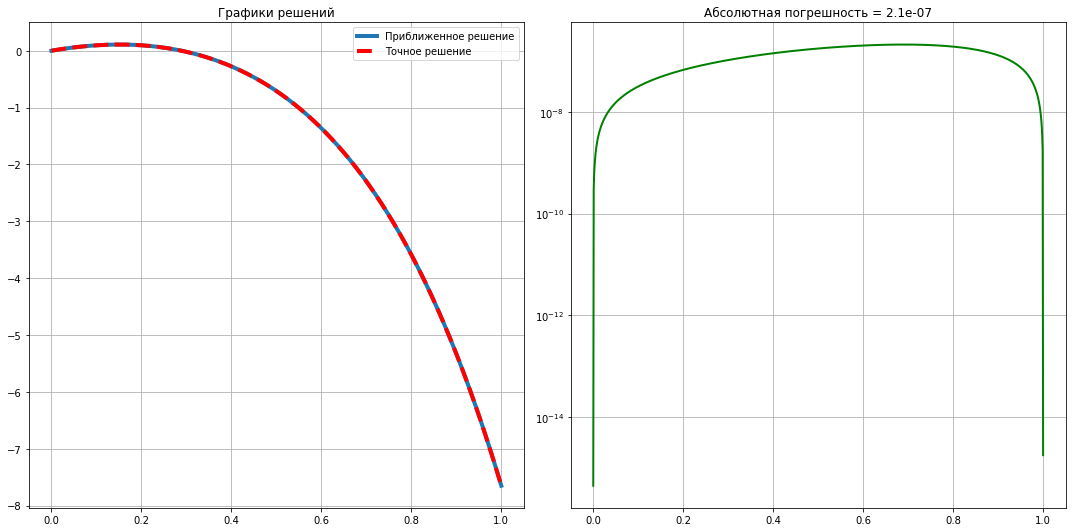

In [43]:
mtx, fb = make_mtx(k, p, q, f, a, b, u_a, u_b, h)
u = TDMA(mtx[:, 0], mtx[:, 1], mtx[:, 2], fb)

x = np.linspace(a, b, len(u))
_, axs = plt.subplots(1, 2, figsize=(15, 7.5))
axs[0].set_title("Графики решений")
axs[0].plot(x, u, label="Приближенное решение", lw=4)
axs[0].plot(x, real_u(x), '--', color="r", label="Точное решение", lw=4)
axs[0].grid()
axs[0].legend()
axs[1].set_title(f"Абсолютная погрешность = {np.max(np.abs(u - real_u(x))):.1e}")
axs[1].plot(x, np.abs(u - real_u(x)), color="green", lw=2)
axs[1].set_yscale('log')
axs[1].grid()
plt.tight_layout()
plt.show()

### Задача 8.2

Стержень составляется из трех частей одинаковой длины `1` и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка $x_0$ стержня имела максимальную температуру? 
Математически задача формулируется следующим образом: найти приближенное решение краевой задачи   
\begin{equation*}
    \begin{cases}
        -(k(x)u')' + q(x)u = f(x), \quad x \in (a, b)
        \\
        \qquad \qquad u(a) = u_a, \quad u(b) = u_b
    \end{cases}
    , где \quad k(x) = 
    \begin{cases}
        k_1(x), \quad 0 \leq x \leq 1
        \\
        k_2(x), \quad 1 < x \leq 2
        \\
        k_3(x), \quad 2 < x \leq 3
    \end{cases}
\end{equation*}
при каждой конфигурации стержня. Значения `q(x)` и `f(x)` взять из таблицы 8.1. 
Сравнить полученные значения температуры в фиксированной точке в каждом варианте. Выбрать оптимальный результат.

**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ**   
1. Составить подпрограмму, вычисляющую функцию `k(x)` из индивидуального варианта;
2. Для каждого варианта конфигурации стержня произвести расчет по разностной схеме с шагом $ h = \frac{b-a}{100} $;
3. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня;
4. Сравнив полученные решения, выбрать оптимальный результат. 
5. Оформить отчет по задаче.

Вариант `N = 39`.

$ x_0 = 1.3 $   
$ k_1(x) = 2x + 4 $   
$ k_2(x) = \sqrt{2x + 1} $   
$ k_3(x) = 11 $   
$ u_a = 6, \quad u_b = 2 $   
$ q(x) = 2.5, \quad f(x) = 4.5x + 10 $   

Преобразуем исходное ДУ для применения метода конечных разностей. Воспользуемся конечно-разностными аппроксимациями производных 2-го порядка.

$$ -k(x)u'' - k'(x)u' + 2.5u = 4.5x + 10 $$
$$ \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + \frac{k'(x)}{k(x)} \cdot \frac{u_{i+1} - u_{i-1}}{2h} - \frac{2.5}{k(x)}u_i = -\frac{1}{k(x)}(4.5x_i + 10) $$
$$ 2u_{i+1} - 4u_i + 2u_{i-1} + h\frac{k'(x)}{k(x)}(u_{i+1} - u_{i-1}) - \frac{5h^2}{k(x)}u_i = -\frac{2h^2}{k(x)}(4.5x_i + 10) $$
$$ \left(-\frac{hk'(x)}{k(x)} + 2\right)u_{i-1} - \left(\frac{5h^2}{k(x)} + 4\right)u_i + \left(\frac{hk'(x)}{k(x)} + 2\right)u_{i+1} = -\frac{2h^2}{k(x)}(4.5x_i + 10) $$

In [50]:
def k1(x):
    return 2*x + 4
def dk1(x):
    return 2 + 0*x
def k2(x):
    return (2*x + 1) ** 0.5
def dk2(x):
    return 1 / (2*x + 1) ** 0.5
def k3(x):
    return 11 + 0*x
def dk3(x):
    return 0*x

def switch_k(x, n):
    if n == 1:
        return k1(x)
    elif n == 2:
        return k2(x)
    else:
        return k3(x)

def k(x, n):
    if x >= 0 and x <= 1:
        return switch_k(x, int(n[0]))
    elif x > 1 and x <= 2:
        return switch_k(x, int(n[1]))
    elif x > 2 and x <= 3:
        return switch_k(x, int(n[2]))

def switch_dk(x, n):
    if n == 1:
        return dk1(x)
    elif n == 2:
        return dk2(x)
    else:
        return dk3(x)

def dk(x, n):
    if x >= 0 and x <= 1:
        return switch_dk(x, int(n[0]))
    elif x > 1 and x <= 2:
        return switch_dk(x, int(n[1]))
    elif x > 2 and x <= 3:
        return switch_dk(x, int(n[2]))

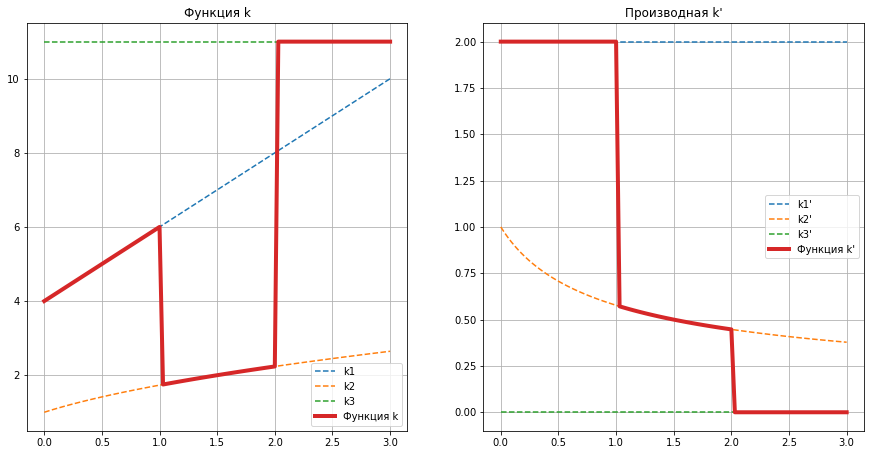

In [52]:
x = np.linspace(0, 3, 100)
_, axs = plt.subplots(1, 2, figsize=(15, 7.5))
axs[0].set_title("Функция k")
axs[0].plot(x, k1(x), label="k1", linestyle ='--')
axs[0].plot(x, k2(x), label="k2", linestyle ='--')
axs[0].plot(x, k3(x), label="k3", linestyle ='--')
axs[0].plot(x, [k(t, "123") for t in x], label="Функция k", lw=4)
axs[0].grid()
axs[0].legend()
axs[1].set_title("Производная k'")
axs[1].plot(x, dk1(x), label="k1'", linestyle ='--')
axs[1].plot(x, dk2(x), label="k2'", linestyle ='--')
axs[1].plot(x, dk3(x), label="k3'", linestyle ='--')
axs[1].plot(x, [dk(t, "123") for t in x], label="Функция k'", lw=4)
axs[1].grid()
axs[1].legend()
plt.show()

In [74]:
def make_mtx_(k, p, q, f, a, b, u_a, u_b, h, n_arr):
    n = int((b-a) / h)
    x_line = np.linspace(a, b, n + 1)
    fb = f(x_line) * (-2 * h ** 2)
    result = np.zeros((n + 1, 3))
    result[0, 1] = 1
    result[n, 1] = 1
    for i in range(1, n):
        result[i-1, 0] = k(x_line[i], h, n_arr)
        result[i, 1] = p(x_line[i], h, n_arr)
        result[i, 2] = q(x_line[i], h, n_arr)
        fb[i] /= k(x_line[i], h, n_arr)
    fb[[0, -1]] = [u_a, u_b]
    return result, fb

In [75]:
a, b = 0, 3
u_a = 6
u_b = 2
h = (b - a) / 100
array_n = ["123", "132", "213", "231", "312", "321"]
def g0(x, h, n):
    return 2 - h * dk(x, n) / k(x, n)
def g1(x, h, n):
    return - ((5 * h ** 2) / k(x, n) + 4)
def g2(x, h, n):
    return 2 + h * dk(x, n) / k(x, n)

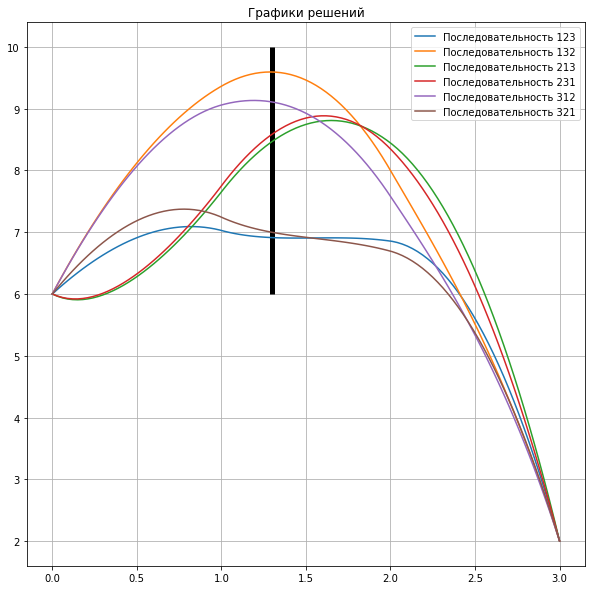

In [85]:
_, axs = plt.subplots(1, figsize=(10, 10))
for n in array_n:
    mtx, fb = make_mtx_(g0, g1, g2, f, a, b, u_a, u_b, h, n)
    u = TDMA(mtx[:, 0], mtx[:, 1], mtx[:, 2], fb)
    x = np.linspace(a, b, len(u))
    axs.plot(x, u, label=f"Последовательность {n}")

axs.vlines(1.3, 6, 10, color="black", lw=5)
axs.set_title("Графики решений")
axs.grid()
axs.legend()
plt.show()

По графикам видно, что наибольшая температура стержня в точке $ x = 1.3 $ достигается при конфигурации `132`.